1.) Create a DataFrame with the following data:

In [24]:
data = {'Name': ['John', 'Alice', 'Bob', 'Charlie'],
        'Age': [28, 24, 22, 30],
        'City': ['New York', 'Los Angeles', 'Chicago', 'San Francisco']}

In [25]:
import pandas as pd

df = pd.DataFrame(data)
df[:3]
print(f"Average age is: {df['Age'].mean()}")

Average age is: 26.0


2.) Create a DataFrame with missing values in some columns. Replace the missing values with the mean.

In [29]:
import numpy as np
df.insert(3, 'Number of cars', [2, np.nan, 1, 4])

In [30]:
df

,Name,Age,City,Number of cars
0,John,28,New York,2.0
1,Alice,24,Los Angeles,NaN
2,Bob,22,Chicago,1.0
3,Charlie,30,San Francisco,4.0


In [31]:
pd.isnull(df).sum()

Name              0
Age               0
City              0
Number of cars    1
dtype: int64

In [45]:
df['Number of cars'].fillna(np.round(df['Number of cars'].mean()), inplace=True)

In [47]:
df

,Name,Age,City,Number of cars
0,John,28,New York,2.000000
1,Alice,24,Los Angeles,2.333333
2,Bob,22,Chicago,1.000000
3,Charlie,30,San Francisco,4.000000


## Titanic dataset

1.) Display the number of passengers in each class.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('titanic.csv')

print(dataset.info())

print(f"Number of class is: {dataset['Pclass'].unique()}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Number of class is: [3 1 2]


In [2]:
class_values = dataset['Pclass'].value_counts()
print(class_values)



Pclass
3    491
1    216
2    184
Name: count, dtype: int64


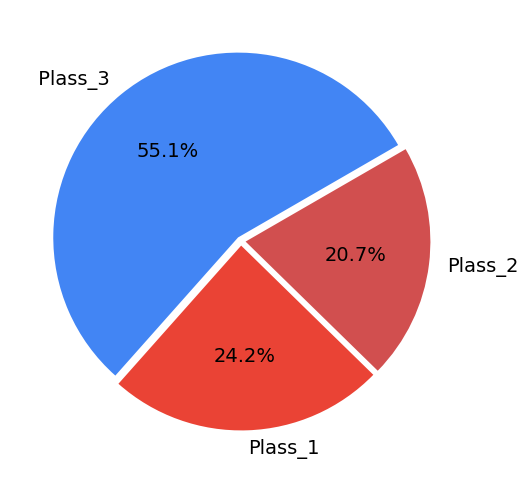

In [3]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#d14f4f']
plt.rcParams.update({'font.size': 14})
plt.pie([class_values[3], class_values[1], class_values[2]],
        labels=[' Plass_3','Plass_1', 'Plass_2'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025, 0.025),
        startangle=30);

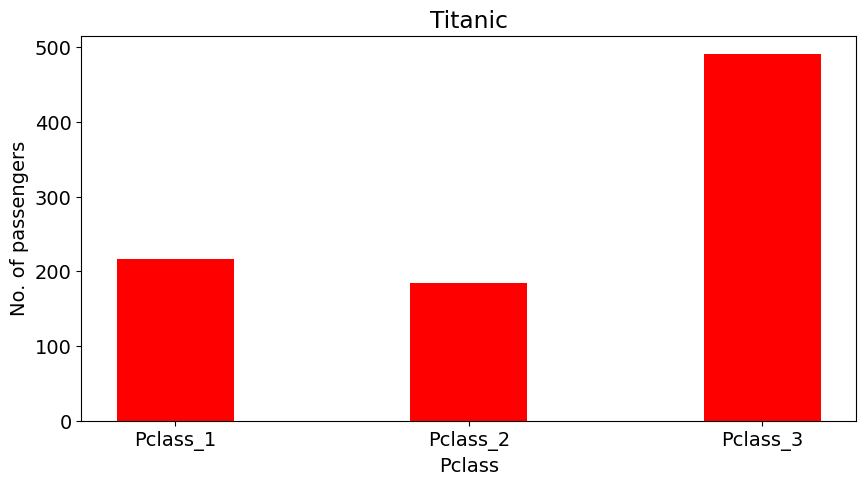

In [4]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(['Pclass_1','Pclass_2','Pclass_3'], [class_values[1], class_values[2], class_values[3]], color ='red', 
        width = 0.4)
 
plt.xlabel("Pclass")
plt.ylabel("No. of passengers")
plt.title("Titanic")
plt.show()

2.) Filter the DataFrame to show only passengers who survived.

In [5]:
dataset[dataset['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


3.) Display the passengers who are female and older than 30.

In [7]:
dataset[(dataset['Sex'] == 'female') & (dataset['Age']>30)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


4.) Display the summary statistics for numerical columns.

In [8]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


5.) Count the number of missing values in each column.

In [9]:
pd.isna(dataset).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

6.) Handle missing values in the 'Age' column. You can choose to fill missing values with the mean, median, or use a more sophisticated method.

In [10]:
# by mean
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

#median
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

7.) Create a new column 'FamilySize' by adding the 'SibSp' and 'Parch' columns.

In [11]:
dataset.insert(6, 'FamilySize', dataset['SibSp'] + dataset['Parch'])

In [12]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,FamilySize,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,3,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,0,111369,30.0000,C148,C


8.) Create a new column 'Title' by extracting titles from the 'Name' column (e.g., Mr., Mrs., Miss).

In [13]:
title = []

for i in dataset['Name']:
    ins = i.split('.')
    title.append(ins[0].split(',')[1])

print(title)


[' Mr', ' Mrs', ' Miss', ' Mrs', ' Mr', ' Mr', ' Mr', ' Master', ' Mrs', ' Mrs', ' Miss', ' Miss', ' Mr', ' Mr', ' Miss', ' Mrs', ' Master', ' Mr', ' Mrs', ' Mrs', ' Mr', ' Mr', ' Miss', ' Mr', ' Miss', ' Mrs', ' Mr', ' Mr', ' Miss', ' Mr', ' Don', ' Mrs', ' Miss', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Miss', ' Miss', ' Mrs', ' Mrs', ' Mr', ' Miss', ' Miss', ' Mr', ' Mr', ' Miss', ' Mr', ' Mrs', ' Master', ' Mr', ' Mrs', ' Mrs', ' Mr', ' Mr', ' Miss', ' Mr', ' Miss', ' Master', ' Mr', ' Miss', ' Mr', ' Master', ' Mr', ' Master', ' Mrs', ' Mr', ' Miss', ' Mr', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Master', ' Miss', ' Mr', ' Mr', ' Miss', ' Mr', ' Miss', ' Mrs', ' Mr', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Mrs', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Mr', ' Mr', ' Miss', ' Mr', ' Mr', ' Miss', ' Mr', ' Miss', ' Mr', ' Miss', ' Miss', ' Mr', ' Mr', ' Mr', ' Mr', ' Miss', ' Mr', ' Mr', ' Mr', ' Miss', ' Mr', ' Master', ' Mr', 

In [14]:
dataset.insert(13, 'Title', title)

In [15]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,FamilySize,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,3,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,0,111369,30.0000,C148,C,Mr


9.) Filter and display passengers who were in the first class and survived.

In [16]:
dataset[(dataset['Pclass'] == 1) & (dataset['Survived'] == 1)].count()

PassengerId    136
Survived       136
Pclass         136
Name           136
Sex            136
Age            136
FamilySize     136
SibSp          136
Parch          136
Ticket         136
Fare           136
Cabin          117
Embarked       134
Title          136
dtype: int64

10.) Find passengers who paid a fare above the average fare.

In [17]:
dataset[dataset['Fare'] > dataset['Fare'].mean()]

,PassengerId,Survived,Pclass,Name,Sex,Age,FamilySize,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,1,0,PC 17599,71.2833,C85,C,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,1,0,113803,53.1000,C123,S,Mrs
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,0,17463,51.8625,E46,S,Mr
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,0,113788,35.5000,A6,S,Mr
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,5,3,2,19950,263.0000,C23 C25 C27,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,2,1,1,36928,164.8667,NaN,S,Mrs
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,10,8,2,CA. 2343,69.5500,NaN,S,Miss
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.000000,0,0,0,PC 17590,50.4958,A24,S,Mr
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,2,1,1,11751,52.5542,D35,S,Mrs


11.) Sort the DataFrame based on the 'Fare' column in descending order.

In [18]:
dataset.sort_values(by='Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,FamilySize,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,0,PC 17755,512.3292,NaN,C,Miss
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.000000,0,0,0,PC 17755,512.3292,B101,C,Mr
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.000000,1,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,5,3,2,19950,263.0000,C23 C25 C27,S,Miss
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,5,3,2,19950,263.0000,C23 C25 C27,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,0,112052,0.0000,NaN,S,Mr
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,0,239853,0.0000,NaN,S,Mr
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.000000,0,0,0,19972,0.0000,NaN,S,Jonkheer
732,733,0,2,"Knight, Mr. Robert J",male,29.699118,0,0,0,239855,0.0000,NaN,S,Mr


12.) Sort the DataFrame based on multiple columns (e.g., 'Pclass' and 'Age').

In [19]:
dataset.sort_values(by=['Pclass', 'Age'], ascending=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,FamilySize,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,3,1,2,113781,151.5500,C22 C26,S,Master
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,3,1,2,113781,151.5500,C22 C26,S,Miss
445,446,1,1,"Dodge, Master. Washington",male,4.00,2,0,2,33638,81.8583,A34,S,Master
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,3,1,2,113760,120.0000,B96 B98,S,Master
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,3,1,2,113760,120.0000,B96 B98,S,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.00,0,0,0,345364,6.2375,NaN,S,Mr
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.00,0,0,0,4134,9.5875,NaN,S,Mrs
280,281,0,3,"Duane, Mr. Frank",male,65.00,0,0,0,336439,7.7500,NaN,Q,Mr
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,0,370369,7.7500,NaN,Q,Mr


13.) Convert the 'Embarked' column to a datetime object.

In [20]:
dataset['Embarked'] = pd.to_datetime(dataset['Embarked'])

/tmp/ipykernel_3248/1178311126.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Embarked'] = pd.to_datetime(dataset['Embarked'])


DateParseError: Unknown datetime string format, unable to parse: S, at position 0

14.) Plot the number of passengers who boarded from each port over time.

In [22]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [58]:
dataset['Embarked'].fillna(dataset['Embarked'].mode(), inplace=True)

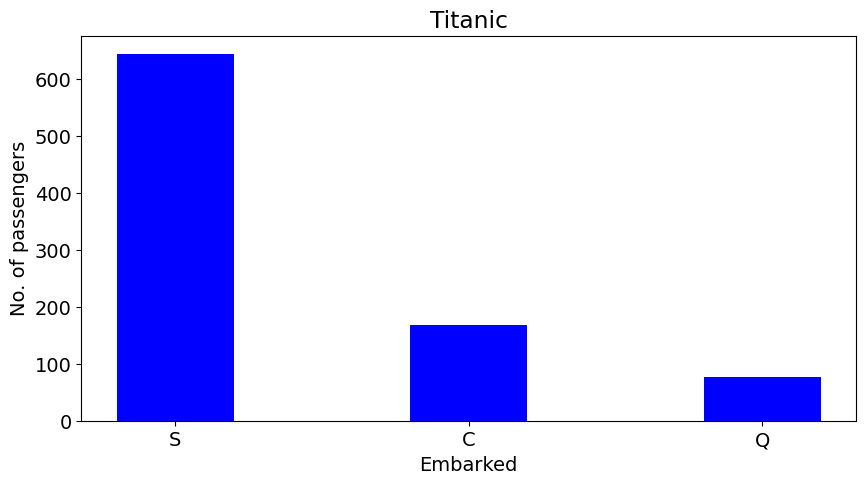

In [61]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(['S','C','Q'], 
        [len(dataset[dataset['Embarked'] == 'S']), 
        len(dataset[dataset['Embarked'] == 'C']),
        len(dataset[dataset['Embarked'] == 'Q'])]
        , color ='blue', 
        width = 0.4)
 
plt.xlabel("Embarked")
plt.ylabel("No. of passengers")
plt.title("Titanic")
plt.show()

15.) Create a bar chart to visualize the count of survivors and non-survivors.

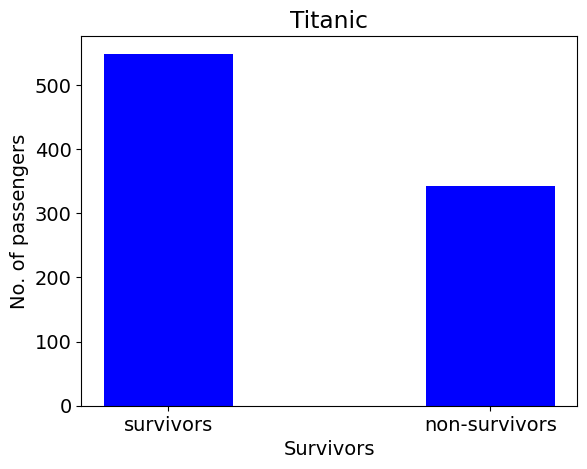

In [62]:
plt.bar(['survivors', 'non-survivors'], 
        [len(dataset[dataset['Survived'] == 0]), 
        len(dataset[dataset['Survived'] == 1])]
        , color ='blue', 
        width = 0.4)
 
plt.xlabel("Survivors")
plt.ylabel("No. of passengers")
plt.title("Titanic")
plt.show()

16.) Plot a heatmap to show the correlation matrix of numerical features.

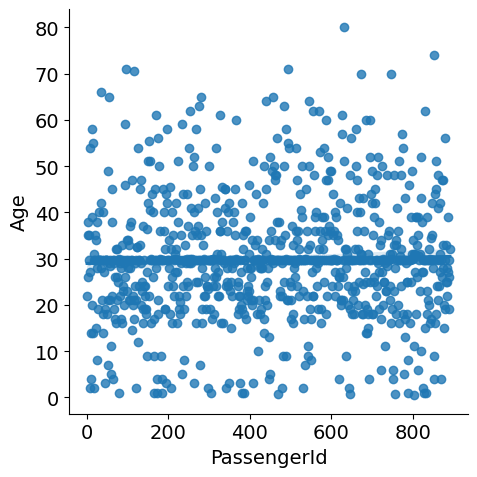

In [90]:
import seaborn as sns 

sns.lmplot(x='PassengerId', y='Age', data=dataset) #correlation function

17.) Use machine learning (e.g., logistic regression) to predict survival based on relevant features.